## Contributors
### Jay Upadhyay
### Haruki Miyazaki
### Victor Sandoval Vargas
###
###

# Libraries

In [53]:
# from tensorflow import keras
# from keras import utils
# from keras.models import Sequential
# from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [54]:
df_orig=pd.read_csv("adult.csv")
df_orig.dropna(inplace=True)
df_orig

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1. Project Proposal


We pulled the data from https://archive-beta.ics.uci.edu/dataset/2/adult .

# 2. Data Collection and data cleaning


## Changing workclass to numeric

In [55]:
workclass_list = list(sorted(set(df_orig[" workclass"])))

for i,x in enumerate(workclass_list):
    print(i,":", x)
    
df_orig[' workclass'].replace(workclass_list,
                        range(len(workclass_list)), inplace=True)

0 :  ?
1 :  Federal-gov
2 :  Local-gov
3 :  Never-worked
4 :  Private
5 :  Self-emp-inc
6 :  Self-emp-not-inc
7 :  State-gov
8 :  Without-pay


## Changing Education to Numeric

In [56]:
education_list = list(sorted(set(df_orig["education"])))

for i,x in enumerate(education_list):
    print(i,":", x)
    
df_orig['education'].replace(education_list,
                        range(len(education_list)), inplace=True)

0 :  10th
1 :  11th
2 :  12th
3 :  1st-4th
4 :  5th-6th
5 :  7th-8th
6 :  9th
7 :  Assoc-acdm
8 :  Assoc-voc
9 :  Bachelors
10 :  Doctorate
11 :  HS-grad
12 :  Masters
13 :  Preschool
14 :  Prof-school
15 :  Some-college


#### Note. I want to come back to this and bin it into appropriate 
I also chose to exclude this for now because I believe education-num already represents it numerically.

## Changing marital status to numeric

In [57]:
marital_list = list(sorted(set(df_orig["marital-status"])))

for i,x in enumerate(marital_list):
    print(i,":", x)

df_orig['marital-status'].replace(marital_list,
                        range(len(marital_list)), inplace=True)

0 :  Divorced
1 :  Married-AF-spouse
2 :  Married-civ-spouse
3 :  Married-spouse-absent
4 :  Never-married
5 :  Separated
6 :  Widowed


## Occupation

I don't like the ? mark section.

In [58]:
occupation_list = list(sorted(set(df_orig["occupation"])))

for i,x in enumerate(occupation_list):
    print(i,":", x)

df_orig['occupation'].replace(occupation_list,
                        range(len(occupation_list)), inplace=True)

0 :  ?
1 :  Adm-clerical
2 :  Armed-Forces
3 :  Craft-repair
4 :  Exec-managerial
5 :  Farming-fishing
6 :  Handlers-cleaners
7 :  Machine-op-inspct
8 :  Other-service
9 :  Priv-house-serv
10 :  Prof-specialty
11 :  Protective-serv
12 :  Sales
13 :  Tech-support
14 :  Transport-moving


## Relationship conversion to numeric

I don't like other relative section here.


In [59]:
relationship_list = list(sorted(set(df_orig["relationship"])))

for i,x in enumerate(relationship_list):
    print(i,":", x)

df_orig['relationship'].replace(relationship_list,
                        range(len(relationship_list)), inplace=True)

0 :  Husband
1 :  Not-in-family
2 :  Other-relative
3 :  Own-child
4 :  Unmarried
5 :  Wife


## Race conversion to numeric


In [60]:
race_list = list(sorted(set(df_orig["race"])))

for i,x in enumerate(race_list):
    print(i,":", x)

df_orig['race'].replace(race_list,
                        range(len(race_list)), inplace=True)

0 :  Amer-Indian-Eskimo
1 :  Asian-Pac-Islander
2 :  Black
3 :  Other
4 :  White


## Sex conversion to numeric

In [61]:
sex_list = list(sorted(set(df_orig["sex"])))

for i,x in enumerate(sex_list):
    print(i,":", x)

df_orig['sex'].replace(sex_list,
                        range(len(sex_list)), inplace=True)

0 :  Female
1 :  Male


## Country to Numeric

In [62]:
# Changing a column "class" to be 0:<=50K and 1:>50K
country_list = list(sorted(set(df_orig["native-country"])))

for i,x in enumerate(country_list):
    print(i,":", x)

df_orig['native-country'].replace(country_list,
                        range(len(country_list)), inplace=True)

0 :  ?
1 :  Cambodia
2 :  Canada
3 :  China
4 :  Columbia
5 :  Cuba
6 :  Dominican-Republic
7 :  Ecuador
8 :  El-Salvador
9 :  England
10 :  France
11 :  Germany
12 :  Greece
13 :  Guatemala
14 :  Haiti
15 :  Holand-Netherlands
16 :  Honduras
17 :  Hong
18 :  Hungary
19 :  India
20 :  Iran
21 :  Ireland
22 :  Italy
23 :  Jamaica
24 :  Japan
25 :  Laos
26 :  Mexico
27 :  Nicaragua
28 :  Outlying-US(Guam-USVI-etc)
29 :  Peru
30 :  Philippines
31 :  Poland
32 :  Portugal
33 :  Puerto-Rico
34 :  Scotland
35 :  South
36 :  Taiwan
37 :  Thailand
38 :  Trinadad&Tobago
39 :  United-States
40 :  Vietnam
41 :  Yugoslavia


## Income to numeric

In [63]:
# Changing a column "class" to be 0:<=50K and 1:>50K
class_list = list(sorted(set(df_orig["class"])))

for i,x in enumerate(class_list):
    print(i,":", x)
    
df_orig['class'].replace(class_list,
                        range(len(class_list)), inplace=True)

0 :  <=50K
1 :  >50K


In [64]:
df_orig

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


## Linear Regression

In [65]:
X_Gender = df_orig[["sex"]]
Y_Income = df_orig["class"]

GenderIncome_model = LinearRegression()
GenderIncome_model.fit(X=X_Gender, y=Y_Income)

LinearRegression()

In [66]:
'''
X_GenderIncome = pd.DataFrame(df_orig)
X_GenderIncome["sex"] = np.linspace(0,1,num=32561)
y_GenderIncome = pd.Series(
    GenderIncome_model.predict(X_GenderIncome),
    index = X_GenderIncome["sex"]
)
'''

'\nX_GenderIncome = pd.DataFrame(df_orig)\nX_GenderIncome["sex"] = np.linspace(0,1,num=32561)\ny_GenderIncome = pd.Series(\n    GenderIncome_model.predict(X_GenderIncome),\n    index = X_GenderIncome["sex"]\n)\n'

In [68]:
GenderIncome_model.predict(
    X=[[0]]
)

/Users/victorsandoval/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.10946059])

In [69]:
GenderIncome_model.predict(
    X=[[1]]
)

/Users/victorsandoval/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.30573658])

Looking solely on gender we can see that it is more likely for a man to have an income of >50k compared to that of a woman. We will now examine if this holds true when women has higher education compared to the male.

In [70]:
X_Gender = df_orig[["sex", "education"]]


## Correlation Matrix

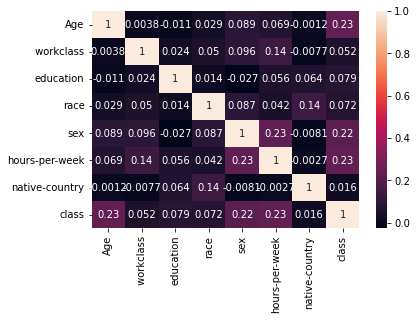

In [ ]:

df_small = df_orig.iloc[:,[0,1,3,8,9,12,13,14]]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

# 3. EDA

# 4. Techniques Used

# 5. Project Proposal